# Linear models

A "linear" model is linear in a feature space, not necessarily in the original data space.

$$y_i = \mathbf{w}^\top \Phi(\mathbf{x})$$

Lots of options for choice of $\Phi$!

One-dimensional example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

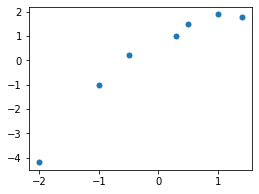

In [2]:
x = np.array([-2, -1, -0.5, 0.5, 0.3, 1, 1.4])
y = np.array([-4.2 , -1 ,  0.2,  1.5,  1.0,  1.9 ,  1.8])
plt.figure(figsize=(4,3))
plt.plot(x, y, '.', markersize=10);
# plt.savefig('../img/linear-data.pdf');

### Model: $\Phi(x) = [1, x]$

In [3]:
Phi = lambda x: np.stack((np.ones_like(x), x)).T

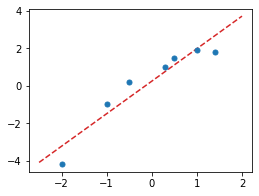

In [4]:
domain = np.linspace(-2.5, 2, 100)
w = np.linalg.solve(Phi(x).T @ Phi(x), Phi(x).T @ y)
plt.figure(figsize=(4,3))
plt.plot(domain, Phi(domain) @ w, '--', color='C3');
plt.plot(x, y, '.', markersize=10);
# plt.savefig('../img/linear-deg1.pdf');

In [5]:
print('y_i = %.02f + %0.2f x_i' % tuple(w))

y_i = 0.25 + 1.74 x_i


### Model: $\Phi(x) = [1, x, x^2, x^3]$

In [6]:
Phi = lambda x: np.stack((np.ones_like(x), x, x**2, x**3)).T

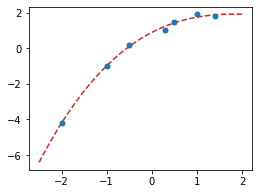

In [7]:
w = np.linalg.solve(Phi(x).T @ Phi(x), Phi(x).T @ y)
plt.figure(figsize=(4,3))
plt.plot(domain, Phi(domain) @ w, '--', color='C3');
plt.plot(x, y, '.', markersize=10);
# plt.savefig('../img/linear-deg3.pdf');

In [8]:
print('y_i = %.02f + %0.2f x_i + %0.2f x_i^2 + %0.2f x_i^3' % tuple(w))

y_i = 0.89 + 1.31 x_i + -0.51 x_i^2 + 0.05 x_i^3


# Random features

If you don't know what good choices of features might be, you can try random features! This works surprisingly well, and there is some theory to back up why:

* [Weighted Sums of Random Kitchen Sinks: Replacing minimization with randomization in learning](https://people.eecs.berkeley.edu/~brecht/papers/08.rah.rec.nips.pdf)
* [Random Features for Large-Scale Kernel Machines](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf)

In this example, we'll construct features of the form

$$\phi(\mathbf{X}) = \cos(\mathbf{A}\mathbf{x} + \mathbf{b})$$

where each entry $A_{ij} \sim \mathcal{N}(0, 1)$ and $b_i$ is uniform on the range $[0, 2\pi]$.

We'll use 80 of these features as input into a logistic regression model.

In [9]:
def spiraldata(N=300):
    r = np.linspace(1,2*np.pi,N)
    x1 = np.array([np.sin(2.*r)*r, np.cos(2*r)*r]).T
    x2 = np.array([np.sin(2.*r+np.pi)*r, np.cos(2*r+np.pi)*r]).T
    X = np.concatenate([x1, x2], axis=0)
    y = np.concatenate([np.zeros(N), np.ones(N)])
    X += np.random.randn(*X.shape)*0.2
    idx = np.random.permutation(2*N)
    return X[idx], y[idx]

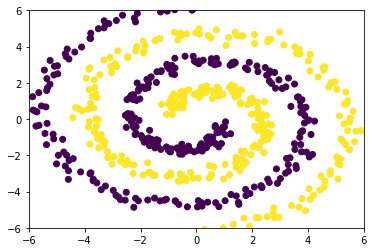

In [10]:
X, y = spiraldata()

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-6, 6)
plt.ylim(-6, 6);
# plt.savefig('../img/spiral-data.pdf');

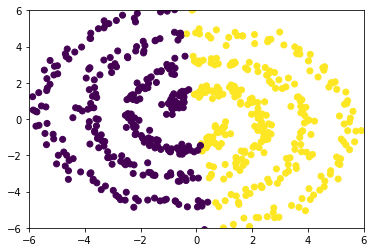

In [11]:
from sklearn import linear_model

simple = linear_model.LogisticRegressionCV()
simple.fit(X, y)
plt.scatter(X[:,0], X[:,1], c=simple.predict(X));
plt.xlim(-6, 6)
plt.ylim(-6, 6);
# plt.savefig('../img/spiral-linear.pdf');

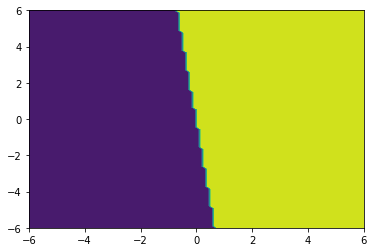

In [12]:
xlist = np.linspace(-6.0, 6.0, 100)
ylist = np.linspace(-6.0, 6.0, 100)
xx, yy = np.meshgrid(xlist, ylist)
plt.xlim(-6, 6)
plt.ylim(-6, 6);
zz = simple.predict(np.stack((xx.ravel(), yy.ravel())).T).reshape(xx.shape)
plt.contourf(xx, yy, zz);
# plt.savefig('../img/spiral-linear-surface.pdf');

In [13]:
K = 80
A = np.random.randn(K, 2)
b = np.random.rand(K) * 2*np.pi
Phi = lambda X: np.cos(X @ A.T + b)

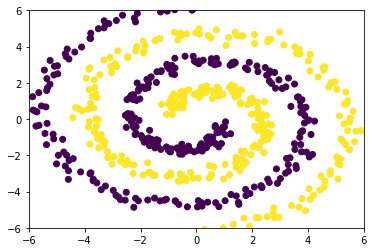

In [14]:
random_feature = linear_model.LogisticRegressionCV(max_iter=200)
random_feature.fit(Phi(X), y)
plt.scatter(X[:,0], X[:,1], c=random_feature.predict(Phi(X)));
plt.xlim(-6, 6)
plt.ylim(-6, 6);
# plt.savefig('../img/spiral-rff.pdf');

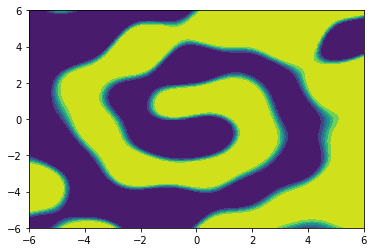

In [15]:
zz = random_feature.predict_proba(Phi(np.stack((xx.ravel(), yy.ravel())).T))[:,1].reshape(xx.shape)
plt.xlim(-6, 6)
plt.ylim(-6, 6);
plt.contourf(xx, yy, zz);
# plt.savefig('../img/spiral-rff-surface.pdf');